# Problem 3 -> Logistic Regression - Linear Classifier
Apply the logistic regression (linear classifier) algorithm discussed in the lab session to predict next-day rain based
on the 10 years of daily weather observations from many locations within a country. The dataset contains many
factors taken into consideration to specify whether it rained or not on that particular day. The training and
testing dataset is provided in the files titled ‘weather_train.csv’ and ‘weather_test.csv’, respectively. Carry out the
following tasks as assignment problems:

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Reading data

In [2]:
train = pd.read_csv("weather_train.csv")
test = pd.read_csv("weather_test.csv")
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Part 1
Inspect and plot some portion of the training data using pandas. Segregate the training and testing data into
two separate variables consisting of ‘feature values’ and corresponding ‘predictions’ (the prediction column is
titled ‘RainTomorrow’ in the dataset). To simplify the problem a bit, clean the whole data by carrying out
the following sub-tasksand display some portion of the data and its head after each data cleaning step:





(a) Convert the predictions in the binary format by using ‘1’ for ‘YES’ and ‘0’ for ‘NO’.

In [3]:
train["RainTomorrow"] = train["RainTomorrow"].apply(lambda x: 0 if x=="No" else 1)
test["RainTomorrow"] = test["RainTomorrow"].apply(lambda x: 0 if x=="No" else 1)
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [4]:
test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,11-01-2014,PearceRAAF,19.0,44.5,0.0,NaN,13.1,E,54.0,E,...,27.0,10.0,1015.3,1009.7,NaN,NaN,31.2,42.9,No,0
1,12-01-2014,PearceRAAF,31.2,44.3,0.0,NaN,12.2,E,54.0,N,...,10.0,22.0,1007.7,1007.8,NaN,NaN,40.2,35.8,No,0
2,13-01-2014,PearceRAAF,19.3,30.3,0.0,NaN,9.4,WSW,46.0,SSW,...,63.0,43.0,1010.9,1009.5,7.0,2.0,23.2,27.6,No,0
3,14-01-2014,PearceRAAF,14.0,29.7,0.0,NaN,13.1,WSW,44.0,SSE,...,43.0,29.0,1012.2,1009.5,0.0,0.0,23.0,29.0,No,0
4,15-01-2014,PearceRAAF,12.7,27.9,0.0,NaN,12.4,W,50.0,NW,...,48.0,34.0,1008.4,1008.4,1.0,3.0,23.4,25.7,No,0


(b) Identify and drop the feature columns having datatype ‘object’.

In [5]:
train=train.select_dtypes(exclude=['object'])
test=test.select_dtypes(exclude=['object'])
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [6]:
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.0,44.5,0.0,NaN,13.1,54.0,26.0,15.0,27.0,10.0,1015.3,1009.7,NaN,NaN,31.2,42.9,0
1,31.2,44.3,0.0,NaN,12.2,54.0,31.0,30.0,10.0,22.0,1007.7,1007.8,NaN,NaN,40.2,35.8,0
2,19.3,30.3,0.0,NaN,9.4,46.0,22.0,28.0,63.0,43.0,1010.9,1009.5,7.0,2.0,23.2,27.6,0
3,14.0,29.7,0.0,NaN,13.1,44.0,17.0,30.0,43.0,29.0,1012.2,1009.5,0.0,0.0,23.0,29.0,0
4,12.7,27.9,0.0,NaN,12.4,50.0,11.0,31.0,48.0,34.0,1008.4,1008.4,1.0,3.0,23.4,25.7,0


(c) Identify cells having ‘NaN’ or ‘NA’ values and replace them with mean values of their respective columns.

In [7]:
for col in train.columns:
    #Identify cells having ‘NaN’ or ‘NA’ values and replace them with mean values of their respective columns.
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(test[col].mean())

train.head()   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0


In [8]:
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.0,44.5,0.0,6.096236,13.1,54.0,26.0,15.0,27.0,10.0,1015.3,1009.7,3.780706,3.935895,31.2,42.9,0
1,31.2,44.3,0.0,6.096236,12.2,54.0,31.0,30.0,10.0,22.0,1007.7,1007.8,3.780706,3.935895,40.2,35.8,0
2,19.3,30.3,0.0,6.096236,9.4,46.0,22.0,28.0,63.0,43.0,1010.9,1009.5,7.000000,2.000000,23.2,27.6,0
3,14.0,29.7,0.0,6.096236,13.1,44.0,17.0,30.0,43.0,29.0,1012.2,1009.5,0.000000,0.000000,23.0,29.0,0
4,12.7,27.9,0.0,6.096236,12.4,50.0,11.0,31.0,48.0,34.0,1008.4,1008.4,1.000000,3.000000,23.4,25.7,0


(d) Normalize all the feature values by scaling them between 0 and 1. The values in feature matrix ‘X’ can
be normalized as:
Xnorm = (X − min(X))/(max(X) − min(X))

In [9]:
for col in train.columns:    
    #Normalize all the feature values by scaling them between 0 and 1.
    minimum_train = train[col].min()
    maximum_train = train[col].max()
    minimum_test = test[col].min()
    maximum_test = test[col].max()
    train[col] = (train[col]-minimum_train)/(maximum_train-minimum_train)
    test[col] = (test[col]-minimum_test)/(maximum_test-minimum_test)
train.head()    

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,0.569921,0.454139,0.001617,0.038129,0.536788,0.289062,0.153846,0.289157,0.701031,0.212121,0.452579,0.477080,0.888889,0.560902,0.490196,0.439189,0.0
1,0.411609,0.503356,0.000000,0.038129,0.536788,0.289062,0.030769,0.265060,0.422680,0.242424,0.500832,0.488964,0.492462,0.560902,0.497549,0.495495,0.0
2,0.556728,0.516779,0.000000,0.038129,0.536788,0.304688,0.146154,0.313253,0.360825,0.292929,0.450915,0.504244,0.492462,0.250000,0.590686,0.470721,0.0
3,0.459103,0.568233,0.000000,0.038129,0.536788,0.132812,0.084615,0.108434,0.432990,0.151515,0.617304,0.573854,0.492462,0.560902,0.519608,0.545045,0.0
4,0.678100,0.664430,0.002695,0.038129,0.536788,0.265625,0.053846,0.240964,0.814433,0.323232,0.504160,0.458404,0.777778,1.000000,0.512255,0.617117,0.0


In [10]:
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,0.664835,0.954198,0.0,0.121439,0.922535,0.387097,0.412698,0.238095,0.262626,0.090909,0.567753,0.5216,0.472588,0.491987,0.788235,0.955882,0.0
1,1.000000,0.949109,0.0,0.121439,0.859155,0.387097,0.492063,0.476190,0.090909,0.212121,0.437393,0.4912,0.472588,0.491987,1.000000,0.781863,0.0
2,0.673077,0.592875,0.0,0.121439,0.661972,0.322581,0.349206,0.444444,0.626263,0.424242,0.492281,0.5184,0.875000,0.250000,0.600000,0.580882,0.0
3,0.527473,0.577608,0.0,0.121439,0.922535,0.306452,0.269841,0.476190,0.424242,0.282828,0.514580,0.5184,0.000000,0.000000,0.595294,0.615196,0.0
4,0.491758,0.531807,0.0,0.121439,0.873239,0.354839,0.174603,0.492063,0.474747,0.333333,0.449400,0.5008,0.125000,0.375000,0.604706,0.534314,0.0


# Defining X and y for training and test data

In [11]:
X = train.drop("RainTomorrow", axis=1).values
y = train["RainTomorrow"]
ones = np.ones((X.shape[0], 1))
X = np.append(ones, X, axis=1)

X_test = test.drop("RainTomorrow", axis=1).values
y_test= test["RainTomorrow"]
ones = np.ones((X_test.shape[0], 1))
X_test = np.append(ones, X_test, axis=1)

# Part 2
Classify the cleaned dataset using binary classification algorithm discussed in the class and calculate the
optimized weights and training set accuracy for the model (use Truncated Newton’s Method in SciPy for
optimization).

Defing Loss Function

In [12]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1/(1 + np.exp(-z))
    return g

def loss(w, X, y):
    h = sigmoid(np.dot(X,w))
    m = len(y)
    J = np.sum( - np.dot( y ,np.log(h) ) - np.dot( np.ones(y.size) - y , np.log(np.ones(y.size) - h) ) )/m
    return J


Defining callback function to store loss for training and test data

In [13]:
train_L = []
test_L = []
i = 1
def loss_save(w):
    global i
    train_loss = loss(w, X, y)
    test_loss = loss(w, X_test, y_test)
    train_L.append(train_loss)
    test_L.append(test_loss)
    i+=1

Start from a random w and implement Optimizer with max iterations 1000 and 1e-8 tolerance using Truncated Newton’s Method in SciPy 

In [14]:
np.random.seed(56)
m, n = X.shape
w = np.random.random((n))
optimizer = minimize(
    loss,
    w,
    args=(X, y),
    method="TNC",
    options={"maxiter": 1000},
    callback=loss_save,
    tol=1e-8
)

So optimized weights are:

In [15]:
wf = optimizer["x"]
wf

array([-4.66659364, -0.1633738 , -0.49964399,  0.3316684 , -0.84242522,
       -1.97642525,  5.99202038, -0.41839728, -2.36416442,  1.39321663,
        4.79312281, -0.78084057, -0.93676955, -0.10827373,  0.92080885,
        0.62330481,  1.05774307])

Getting hypothesis/prediction for training set

In [16]:
h = sigmoid(np.dot(X,wf))
for i in range(h.size):
    h[i] = np.round(h[i])

Calculating training set accuracy

In [17]:
train_accuracy = np.mean(y== h)*100
print("Training accuracy is:", round(train_accuracy,3),"%")

Training accuracy is: 81.993 %


# Part 3
 Plot the cost history (J) vs. the number of iterations. [Hint: You can make use of ‘callback function’ in
Optimize.minimize to store the cost history]

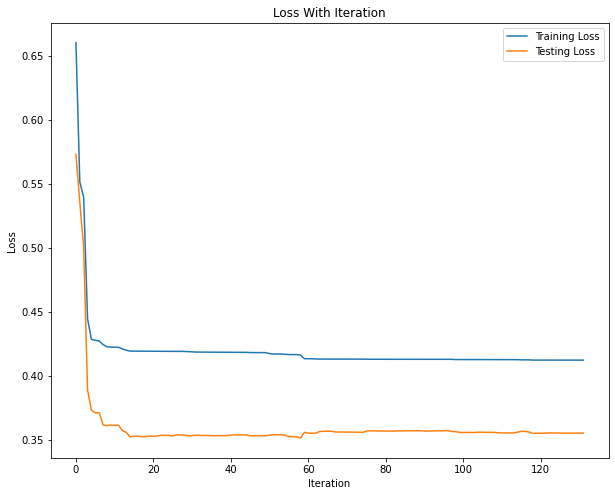

In [18]:
plt.figure()
plt.plot(train_L, label = "Training Loss")
plt.plot(test_L, label = "Testing Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss With Iteration")
plt.legend()
plt.savefig("p3.jpg")


# Part 4
Apply the trained model on the cleaned test dataset to predict the testing accuracy of the model.

In [19]:
h_test = sigmoid(np.dot(X_test,wf))
for i in range(h_test.size):
    h_test[i] = np.round(h_test[i])
test_accuracy = np.mean(y_test== h_test)*100
print("Training accuracy is:", round(test_accuracy,3),"%")    

Training accuracy is: 84.653 %
